In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [18]:
data = pd.read_csv('/content/drive/MyDrive/Academics/255/Project/Clean_Crime_Incidents.csv')
data.columns

Index(['Unnamed: 0', 'index', 'Case Number', 'Incident Datetime',
       'Incident Type Primary', 'Incident Description', 'Parent Incident Type',
       'Hour of Day', 'Day of Week', 'Address', 'Location', 'Latitude',
       'Longitude', 'Created At', '2010 Census Tract',
       '2010 Census Block Group', '2010 Census Block', 'Census Tract',
       'Census Block', 'Census Block Group', 'Neighborhood', 'Police District',
       'Council District', 'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup',
       'GEOID20_block'],
      dtype='object')

In [39]:
extracted_data = data[['Hour of Day', 'Census Block Group', 'Parent Incident Type']]
extracted_data['Parent Incident Type'].value_counts()

Theft                   120270
Assault                  56868
Breaking & Entering      52619
Theft of Vehicle         22651
Robbery                  17925
Sexual Assault            2475
Other Sexual Offense      2222
Homicide                   950
Sexual Offense             400
Name: Parent Incident Type, dtype: int64

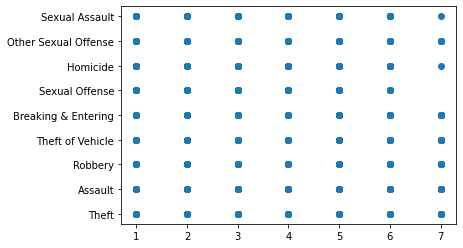

In [20]:
plt.scatter(extracted_data['Census Block Group'],extracted_data['Parent Incident Type'])

In [45]:
crime_numeric_mapping = {}
crime_numeric_mapping['Theft'] = 1
crime_numeric_mapping['Assault'] = 2
crime_numeric_mapping['Robbery'] = 3
crime_numeric_mapping['Theft of Vehicle'] = 4
crime_numeric_mapping['Breaking & Entering'] = 5
crime_numeric_mapping['Sexual Offense'] = 6
crime_numeric_mapping['Homicide'] = 7
crime_numeric_mapping['Other Sexual Offense'] = 8
crime_numeric_mapping['Sexual Assault'] = 9

In [52]:
# for i in extracted_data.index:
#      if(extracted_data['Parent Incident Type'][i] not in crime_numeric_mapping):
#        print(i, extracted_data['Parent Incident Type'][i])

# extracted_data['crime_number'] = extracted_data['Parent Incident Type'].map(crime_numeric_mapping)
# extracted_data = extracted_data.drop(columns=['Parent Incident Type'])
extracted_data

,Hour of Day,Census Block Group,crime_number
0,17,1,1
1,11,1,2
2,10,1,2
3,23,2,2
4,2,1,3
...,...,...,...
276375,0,1,2
276376,9,1,3
276377,16,4,1
276378,18,2,1


In [62]:
kmean = KMeans(n_clusters=2)
clusters_array = kmean.fit_predict(extracted_data)
kmean.cluster_centers_

array([[17.022673  ,  2.23016715,  2.41014014,  0.75176681],
       [ 4.01898791,  2.23536329,  2.63146801,  1.33183167]])

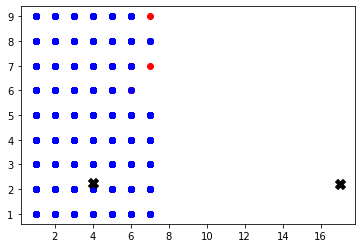

In [63]:
extracted_data['cluster_no'] = clusters_array
extracted_data[extracted_data['cluster_no'] == 0]

cluster_1_data = extracted_data[extracted_data['cluster_no'] == 0]
cluster_2_data = extracted_data[extracted_data['cluster_no'] == 1]
cluster_3_data = extracted_data[extracted_data['cluster_no'] == 2]

plt.scatter(cluster_1_data['Census Block Group'], cluster_1_data['crime_number'], color = 'r')
plt.scatter(cluster_2_data['Census Block Group'], cluster_2_data['crime_number'], color = 'b')
plt.scatter(cluster_3_data['Census Block Group'], cluster_3_data['crime_number'], color = 'g')

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], 
            marker="X", c="black", s=100, label="centroids")
plt.show()

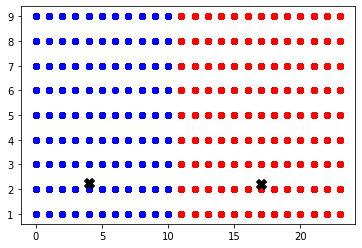

In [64]:
extracted_data['cluster_no'] = clusters_array
extracted_data[extracted_data['cluster_no'] == 0]

cluster_1_data = extracted_data[extracted_data['cluster_no'] == 0]
cluster_2_data = extracted_data[extracted_data['cluster_no'] == 1]
cluster_3_data = extracted_data[extracted_data['cluster_no'] == 2]

plt.scatter(cluster_1_data['Hour of Day'], cluster_1_data['crime_number'], color = 'r')
plt.scatter(cluster_2_data['Hour of Day'], cluster_2_data['crime_number'], color = 'b')
plt.scatter(cluster_3_data['Hour of Day'], cluster_3_data['crime_number'], color = 'g')

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], 
            marker="X", c="black", s=100, label="centroids")
plt.show()

Inference: 

1. Most of the crimes happen in areas having census block group from 1 - 7. These are the areas that people should be aware about. Also the areas having group number after 7 are completey safe. 

2. More crimes tend to happen after 10 AM in the morning, however, before 10 AM, the crimes are also high.

In [60]:
dangerous_address = data[data['Census Block Group'] < 8]['Address']
dangerous_address

0               100 Block BECK ST
1            400 Block NIAGARA ST
2            2300 Block SENECA ST
3             0 Block THEODORE ST
4           FULTON ST & CHERRY ST
                   ...           
276375      100 Block SCHUTRUM ST
276376      1000 Block ELMWOOD AV
276377    1000 Block E LOVEJOY ST
276378          0 Block CELTIC PL
276379     2000 Block DELAWARE AV
Name: Address, Length: 276380, dtype: object